# Rainy River Flows

The purpose of this notebook is to create a data series for the flow on upper Rainy River. The data series is written to a file `RR.pkl` that can be read into other notebooks using `RR = pd.read_pickle('./data/RR.pkl')`.
The data series is constructed using data for station 05PC019 from the Water Survey of Canada database.

## Read Data from Water Survey of Canada

The Water Survey of Canada currently maintains level and flow stations on Rainy River River. Station 05PC019, located on Rainy River near the International Falls Dam, records flow rate on upper Rainy River.

The data set is imported into the workspace by running the Water Survey of Canada notebook.

In [6]:
# Display graphics inline with the notebook
%matplotlib notebook

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

hydat = pd.HDFStore('../data/hydat.h5')
DLY_LEVELS = hydat['DLY_LEVELS']
DLY_FLOWS = hydat['DLY_FLOWS']
STATIONS = hydat['STATIONS']

def getFlowsWSC(s):
    data = DLY_FLOWS[DLY_FLOWS['STATION_NUMBER'] == s]
    ts = {}
    for k in data.index:
        mo = str(data.ix[k,'MONTH'])
        yr = str(data.ix[k,'YEAR'])
        for n in range(1,data.ix[k,'NO_DAYS']+1):
            ts[pd.to_datetime(mo+'/'+str(n)+'/'+yr)] = data.ix[k,'FLOW'+str(n)]  
    ts = pd.Series(ts)
    ts.name = STATIONS.ix[s,'STATION_NAME'] + ' (' + s + ')'
    # drop initial and terminal null entries
    j = 0
    while pd.isnull(ts.ix[j]):
        j += 1
    k = len(ts.index) - 1
    while pd.isnull(ts.ix[k]):
        k += -1 
    return ts[j:k]

def getLevelsWSC(s):
    global DLY_LEVELS
    data = DLY_LEVELS[DLY_LEVELS['STATION_NUMBER'] == s]
    ts = {}
    for k in data.index:
        mo = str(data.ix[k,'MONTH'])
        yr = str(data.ix[k,'YEAR'])
        for n in range(1,data.ix[k,'NO_DAYS']+1):
            ts[pd.to_datetime(mo+'/'+str(n)+'/'+yr)] = data.ix[k,'LEVEL'+str(n)]  
    ts = pd.Series(ts)
    ts.name = STATIONS.ix[s,'STATION_NAME'] + ' (' + s + ')'
    # drop initial and terminal null entries
    j = 0
    while pd.isnull(ts.ix[j]):
        j += 1
    k = len(ts.index) - 1
    while pd.isnull(ts.ix[k]):
        k += -1
    return ts[j:k]

def mapWSC(stationList):
    S = STATIONS.ix[stationList,['STATION_NAME','LATITUDE','LONGITUDE']]
    locs = ["{0},{1}".format(S.ix[s,'LATITUDE'], S.ix[s,'LONGITUDE']) \
             for s in S.index]
    google_maps_url = \
        "https://maps.googleapis.com/maps/api/staticmap?" + \
        "size=640x320" + \
        "&maptype=terrain" + \
        "&markers=color:red%7Csize:mid%7C" + "|".join(locs)
    img = Image(url = google_maps_url)    
    display(img)
    return S

The following map shows the location of flow station 05PC019 relative to level stations at Pither's Point Site No. 1 (05PC024, Base of Rainer Rapids), Pither's Point Site No 2. (05PC205, downstream of the narrows), and Rainy Lake near Fort Frances (05PB007). 

In [7]:
mapWSC(['05PC019','05PC024','05PC025','05PB007'])

,STATION_NAME,LATITUDE,LONGITUDE
STATION_NUMBER,,,
05PC019,RAINY RIVER AT FORT FRANCES,48.60853,-93.40344
05PC024,RAINY RIVER AT PITHERS POINT SITE NO.1,48.61389,-93.35472
05PC025,RAINY RIVER AT PITHERS POINT SITE NO.2,48.61625,-93.35992
05PB007,RAINY LAKE NEAR FORT FRANCES,48.64912,-93.32068


In [8]:
RR = getFlowsWSC('05PC019')
print RR.head()
print RR.tail()

1905-10-25    399
1905-10-26    405
1905-10-27    396
1905-10-28    394
1905-10-29    391
Name: RAINY RIVER AT FORT FRANCES (05PC019), dtype: float64
2014-12-26    170
2014-12-27    170
2014-12-28    170
2014-12-29    169
2014-12-30    169
Name: RAINY RIVER AT FORT FRANCES (05PC019), dtype: float64


## Data History

<IPython.core.display.Javascript object>


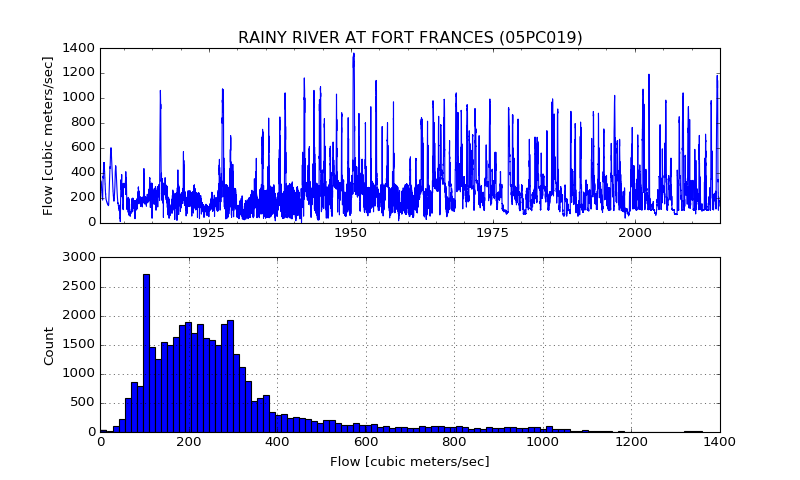

In [9]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
RR.plot()
plt.title(RR.name)
plt.ylabel('Flow [cubic meters/sec]');

plt.subplot(2,1,2)
RR.hist(bins=100)
plt.xlabel('Flow [cubic meters/sec]')
plt.ylabel('Count')

## Writing Rainy River Flow Data to a file

In [10]:
RR.to_pickle('../data/RR.pkl')